In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Ejercicio II.

In [2]:
olymp = pd.read_csv('https://raw.githubusercontent.com/mhemmg/datasets/master/sport/athlete_events.csv')
olymp.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 1. Para el deporte particular de remo  (*rowing*), ver si la edad de las medallistas de oro femeninas está aumentando o disminuyendo a través del tiempo.

A través de una máscara se pueden filtrar las características `Sport`, `Medal` y `Sex`.

In [3]:
mask = (olymp.Sport=='Rowing') & (olymp.Medal=='Gold') & (olymp.Sex=='F')
rowing = olymp[mask]

In [4]:
rowing.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2577,1443,Brigitte Ahrenholz,F,23.0,178.0,85.0,East Germany,GDR,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Women's Coxed Eights,Gold
4380,2495,Larisa Aleksandrova-Popova,F,23.0,180.0,83.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Rowing,Rowing Women's Double Sculls,Gold
8547,4701,Chira Irina Apostol (-Stoian),F,24.0,180.0,78.0,Romania,ROU,1984 Summer,1984,Summer,Los Angeles,Rowing,Rowing Women's Coxed Fours,Gold
8879,4876,Rodica Arba-Pucatu,F,22.0,179.0,75.0,Romania,ROU,1984 Summer,1984,Summer,Los Angeles,Rowing,Rowing Women's Coxless Pairs,Gold
8880,4876,Rodica Arba-Pucatu,F,26.0,179.0,75.0,Romania,ROU,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Women's Coxless Pairs,Gold


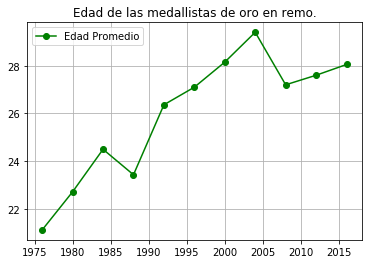

In [5]:
ages = rowing.groupby('Year')['Age'].mean()
plt.title('Edad de las medallistas de oro en remo.')
plt.plot(ages, 'go-', label='Edad Promedio')
plt.legend()
plt.grid()

De la gráfica es posible ver que la **edad media** de las medallistas de oro en remo está **aumentando** con el tiempo.

In [6]:
def Linear(x, a, b):
    return a*x+b

In [7]:
from scipy import optimize
linFit = optimize.curve_fit(Linear, rowing.Year.unique(), ages)

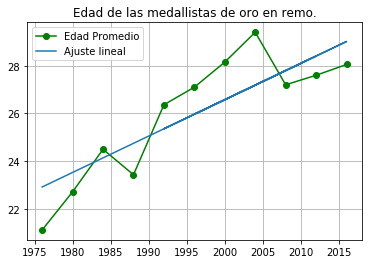

In [8]:
plt.title('Edad de las medallistas de oro en remo.')
plt.plot(ages, 'go-', label='Edad Promedio')
plt.plot(rowing.Year.unique(), Linear(rowing.Year.unique(), *linFit[0]), label='Ajuste lineal')
plt.legend()
plt.grid()

A partir de un ajuste lineal se podría extrapolar el crecimiento en la edad de las medallistas, sin embargo, un crecimiento lineal en la edad llevaría a tener en el futuro edades que sobrepasen la esperanza de vida de un ser humano.

### 2. Otra información a partir de los datos.

#### a. Evolución de los paises latinoamericanos.

Por ejemplo, se puede observa el número de medallas obtenias por año por algunos paises latinoamericanos.

In [9]:
latCount = ['Argentina', 'Brazil', 'Mexico', 'Colombia', 'Peru', 'Costa Rica']
latMed = []
for country in latCount:
    medals = olymp[olymp.Team==country]
    counting = medals[~pd.isna(medals.Medal)].groupby('Year')['Medal'].count()
    latMed.append(counting)

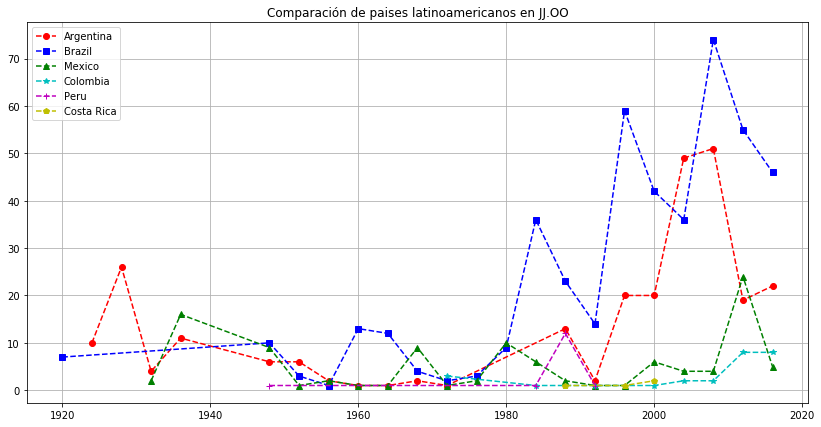

In [10]:
styles = ['ro--', 'bs--', 'g^--', 'c*--', 'm+--', 'yp--']
plt.figure(figsize=(14,7))
plt.title('Comparación de paises latinoamericanos en JJ.OO')
for i in range(len(latCount)):
    plt.plot(latMed[i], styles[i], label=latCount[i])
    plt.legend()
plt.grid()

Esta gráfica muestra que Brasil y Argentina son de los paises latinoamericanos mejor posicionados en la medallería de los Juegos Olímpicos. También se ve que la tendencia en cuanto obtención de medallas ha venido en crecimiento desde los $80$'s del siglo pasado, si se compara con años anteriores donde pŕacticamente se mantuvo constante; por lo que se podría analizar posibles causas de ese cambio en la tendencia.

Para Colombia el crecimiento empieza apenas en los $2000$, mostrando un posible araso en el desarollo deportivos del país frente a tros en la región, además de que el crecimiento en este caso es más lento que lo observado para Brasil o Argentina.

#### b. Índice de Masa Corporal (IMC).

El índice de masa corporal(IMC) es un criterio ampliamente aceptado pero no es exacto. Clasifica a las personas en infrapeso, peso normal, sobrepeso y obesidad, basándose exclusivamente en la masa del individuo y su altura.

$$i = \frac{masa}{altura^2} \quad [i]=\frac{Kg}{m^2}$$

In [11]:
imc = olymp.copy()
imc['IMC'] = imc.Weight/(imc.Height/100)**2

Con la nueva columna `IMC` añadida.

In [12]:
imc.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,IMC
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20.761246
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,23.959094


El IMC como función del tiempo puede obtenerse a partir de los datos.

In [13]:
#Agrupando por año y por participante.
persons = imc.groupby(['Year', 'ID'])

In [14]:
#Para extraer los años y las personas en los que se agruparon las entradas del DF.
group = persons.groups.keys()
years, ids = zip(*list(group))

In [15]:
#Lista ordenada de los años registrados.
nyears = sort(list(set(years)))

#Conteo del número de personas participantes por año.
conteo = [ years.count(yr) for yr in nyears]
conteo.insert(0, 0)

In [16]:
#Este arreglo define entre qué índices de la lista va cada año.
lims = np.cumsum(conteo)

In [17]:
#Se calcula para cada año el valor medio del IMC.
imcs = [persons['IMC'].mean()[lims[i]:lims[i+1]].dropna().mean() for i in range(0,len(lims)-1)]

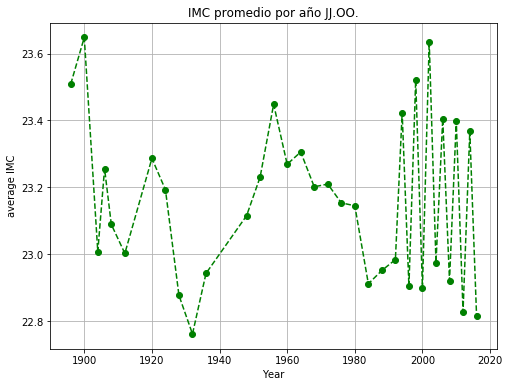

In [18]:
figure(figsize=(8,6))
plt.title('IMC promedio por año JJ.OO.')
plt.plot(nyears, imcs, 'go--')
plt.xlabel('Year')
plt.ylabel('average IMC')
plt.grid()

In [19]:
#Promedio a partir de 1992.
mean(imcs[-13:])

23.159889921903428

En los primeros años de los juegos olímpicos las grandes fluctuaciones del IMC puede ser debido a la cantidad de participantes, ó pueden indicar que la nutrición no se tenía tanto en cuenta a la hora de tratar con deportistas; en contraste con lo que se puede ver desde los 90's, donde el valor del IMC promedio ronda al rededor de $23.16$ y el valor en cada ocación parece mantenerse entorno a este valor.